# EEG Data Analysis
Following analysis is performed for the 'EEG during Mental Arithmetic Tasks' dataset. 

In [1]:
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
#import data
all_edf_files = glob('../data/edf_inputs/*.edf')

In [118]:
#seperating rest and task data
raw_rest_data = [i for i in all_edf_files if '1' in i.split('_')[2]]
raw_task_data = [i for i in all_edf_files if '2' in i.split('_')[2]]

# Rest EEG analysis

In [160]:
%%capture
rest_data = mne.io.read_raw_edf(raw_rest_data[0], preload=True)
rest_data.set_eeg_reference()
rest_data.filter(l_freq=0.5, h_freq=45)

In [168]:
r_epochs = mne.make_fixed_length_epochs(rest_data, duration=5, overlap=1, preload=True)
print(r_epochs)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 2500 original time points ...
0 bad epochs dropped
<Epochs |  45 events (all good), 0 - 4.998 sec, baseline off, ~18.0 MB, data loaded,
 '1': 45>


In [169]:
raw_data_array = r_epochs.get_data()

In [170]:
rest_data_events = r_epochs['1'].average()   
rest_data_events

<Evoked | '1' (average, N=45), 0 – 4.998 sec, baseline off, 21 ch, ~435 kB>

In [171]:
rest_data_events.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: True
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>

In [172]:
rest_data_events.info['ch_names']

['EEG Fp1',
 'EEG Fp2',
 'EEG F3',
 'EEG F4',
 'EEG F7',
 'EEG F8',
 'EEG T3',
 'EEG T4',
 'EEG C3',
 'EEG C4',
 'EEG T5',
 'EEG T6',
 'EEG P3',
 'EEG P4',
 'EEG O1',
 'EEG O2',
 'EEG Fz',
 'EEG Cz',
 'EEG Pz',
 'EEG A2-A1',
 'ECG ECG']

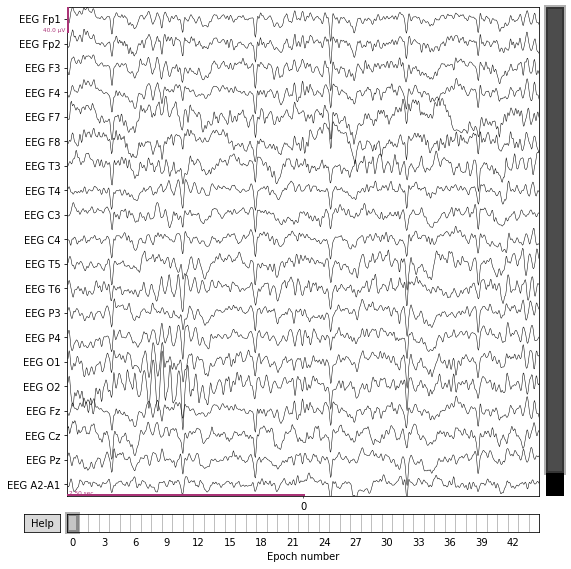

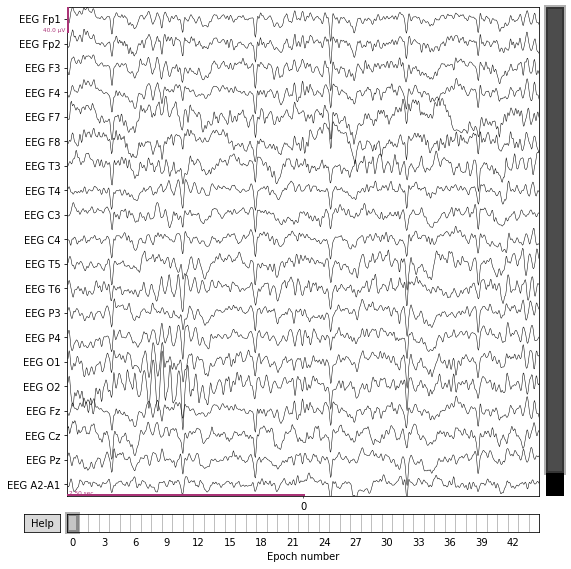

In [173]:
r_epochs['1'].plot(n_epochs=1)

Independent Component Analysis

In [175]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [176]:
ica.fit(r_epochs.copy().filter(8,35))

Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 21 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 945 out of 945 | elapsed:    0.4s finished


Selecting by number: 20 components
Fitting ICA took 3.4s.


<ipython-input-176-4cde8a9a24aa>:1: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (18) and smallest (1.5e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(r_epochs.copy().filter(8,35))


Method,fastica
Fit,52 iterations on epochs (112500 samples)
ICA components,20
Available PCA components,21
Channel types,eeg
ICA components marked for exclusion,—


In [198]:
ch_names_rest = rest_data_events.info["ch_names"]

In [205]:
bad_idx_list = []
for i in ch_names_rest:
    bad_idx, scores = ica.find_bads_eog(rest_data_events, i, threshold=2)
    bad_idx_list.append(bad_idx)
print(bad_idx_list)

Using EOG channel: EEG Fp1
Using EOG channel: EEG Fp2
Using EOG channel: EEG F3
Using EOG channel: EEG F4
Using EOG channel: EEG F7
Using EOG channel: EEG F8
Using EOG channel: EEG T3
Using EOG channel: EEG T4
Using EOG channel: EEG C3
Using EOG channel: EEG C4
Using EOG channel: EEG T5
Using EOG channel: EEG T6
Using EOG channel: EEG P3
Using EOG channel: EEG P4
Using EOG channel: EEG O1
Using EOG channel: EEG O2
Using EOG channel: EEG Fz
Using EOG channel: EEG Cz
Using EOG channel: EEG Pz
Using EOG channel: EEG A2-A1
Using EOG channel: ECG ECG


[[0],
 [16, 3],
 [0, 5, 8],
 [0, 2, 10],
 [13],
 [10, 2],
 [0],
 [0, 4, 5],
 [0, 9],
 [0, 4],
 [0, 5, 8],
 [0],
 [0, 3],
 [0],
 [3, 0, 5],
 [1, 0, 3],
 [],
 [0, 15],
 [0, 11],
 [],
 [0, 5]]

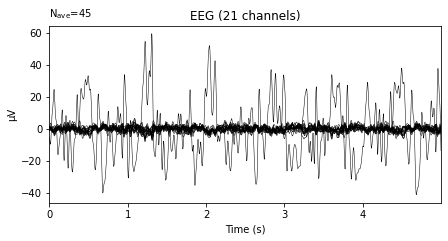

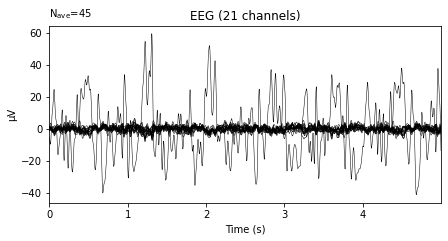

In [184]:
rest_data_events.plot()

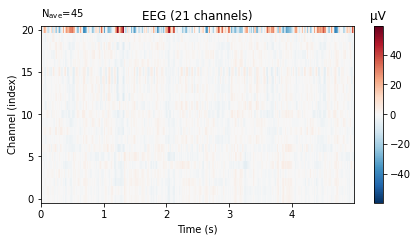

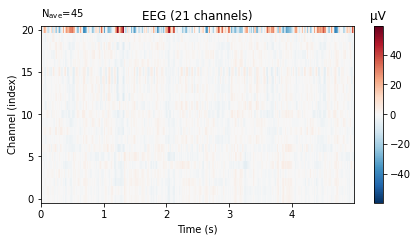

In [28]:
rest_data_events.plot_image()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-29-c68809bdc446>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rest_data_events.plot_psd()
C:\Users\neela\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


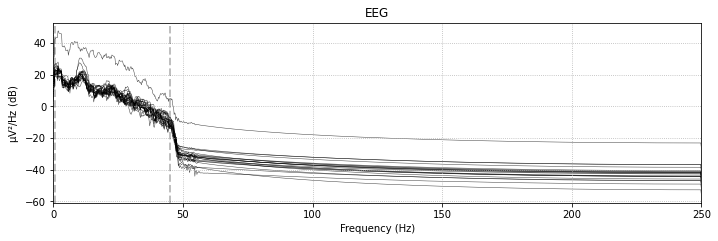

In [29]:
rest_data_events.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-30-4ede5a625d4b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rest_data_events.plot_psd(fmin=0,fmax=40)
C:\Users\neela\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


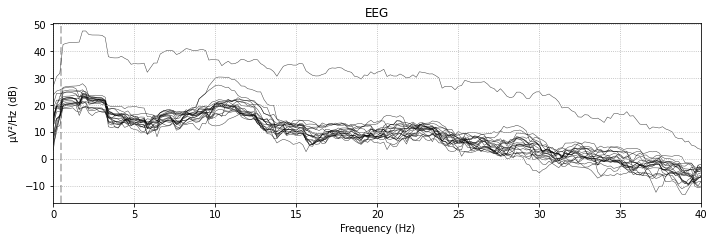

In [30]:
rest_data_events.plot_psd(fmin=0,fmax=40)

# Task EEG Analysis

In [161]:
%%capture
task_data = mne.io.read_raw_edf(raw_task_data[0], preload=True)
task_data.set_eeg_reference()
task_data.filter(l_freq=0.5, h_freq=45)

In [211]:
t_epochs = mne.make_fixed_length_epochs(task_data, duration=5, overlap=1, preload=True)
print(t_epochs)

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 2500 original time points ...
0 bad epochs dropped
<Epochs |  15 events (all good), 0 - 4.998 sec, baseline off, ~6.0 MB, data loaded,
 '1': 15>


In [33]:
task_data_events = t_epochs['1'].average()
task_data_events

<Evoked | '1' (average, N=15), 0 – 4.998 sec, baseline off, 21 ch, ~435 kB>

In [34]:
task_data_events.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: True
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>

Using data from preloaded Raw for 1 events and 2500 original time points ...


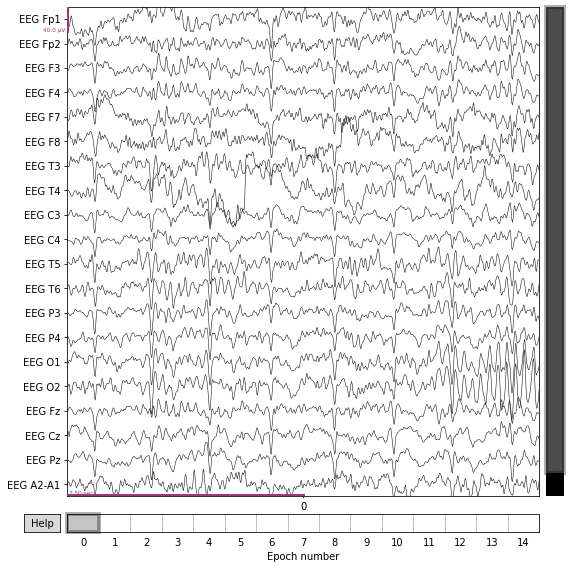

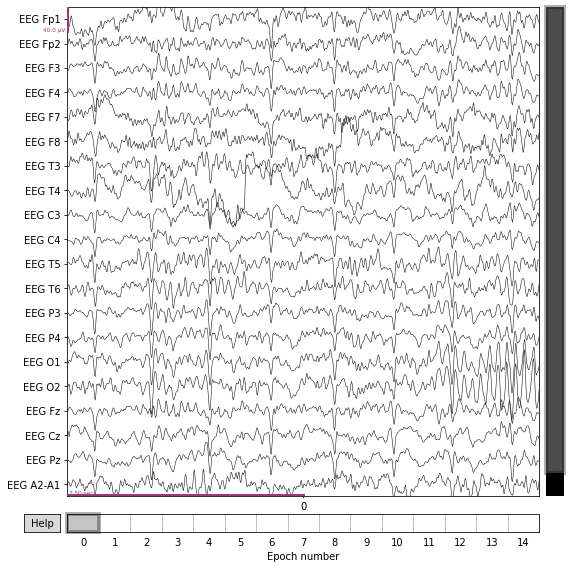

In [210]:
t_epochs['1'].plot(n_epochs=1)

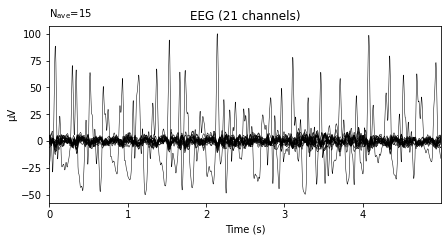

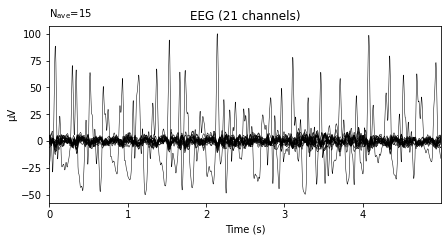

In [36]:
task_data_events.plot()

Independent Component Analysis

In [212]:
ica.fit(t_epochs.copy().filter(8,35))

Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 sec)

Fitting ICA to data using 21 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    0.1s finished


Selecting by number: 20 components
Fitting ICA took 1.6s.


Method,fastica
Fit,64 iterations on epochs (37500 samples)
ICA components,20
Available PCA components,21
Channel types,eeg
ICA components marked for exclusion,—


In [214]:
ch_names_task = task_data_events.info["ch_names"]

In [215]:
bad_idx_list = []
for i in ch_names_task:
    bad_idx, scores = ica.find_bads_eog(task_data_events, i, threshold=2)
    bad_idx_list.append(bad_idx)
print(bad_idx_list)

Using EOG channel: EEG Fp1
Using EOG channel: EEG Fp2
Using EOG channel: EEG F3
Using EOG channel: EEG F4
Using EOG channel: EEG F7
Using EOG channel: EEG F8
Using EOG channel: EEG T3
Using EOG channel: EEG T4
Using EOG channel: EEG C3
Using EOG channel: EEG C4
Using EOG channel: EEG T5
Using EOG channel: EEG T6
Using EOG channel: EEG P3
Using EOG channel: EEG P4
Using EOG channel: EEG O1
Using EOG channel: EEG O2
Using EOG channel: EEG Fz
Using EOG channel: EEG Cz
Using EOG channel: EEG Pz
Using EOG channel: EEG A2-A1
Using EOG channel: ECG ECG
[[14, 1], [0, 1, 13, 9], [], [0, 1, 9], [12, 1], [], [0, 6], [0, 11, 3], [0, 8], [0], [2, 0, 3], [0, 5], [0, 3, 1], [0, 1], [1, 3, 0], [1, 0], [0, 1, 9, 2, 14], [0, 6], [0, 1], [4, 0], [0, 8]]


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-37-0e7e7f9c8335>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  task_data_events.plot_psd()
C:\Users\neela\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


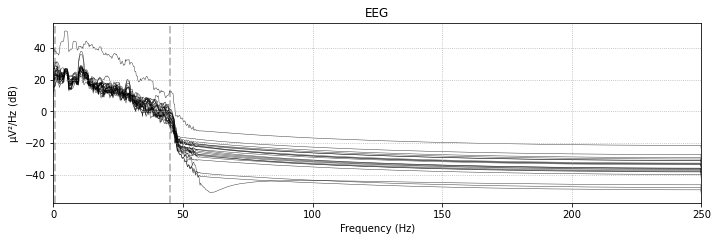

In [37]:
task_data_events.plot_psd()

# Rest vs Task data comparison

In [49]:
diff = mne.combine_evoked((rest_data_events, task_data_events), weights='equal')

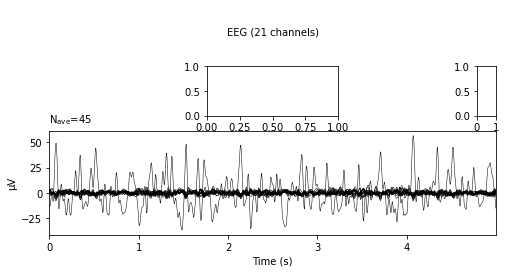

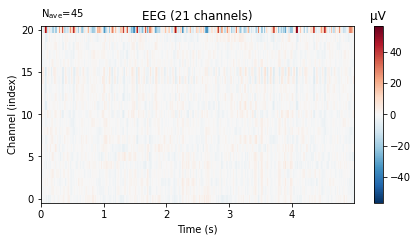

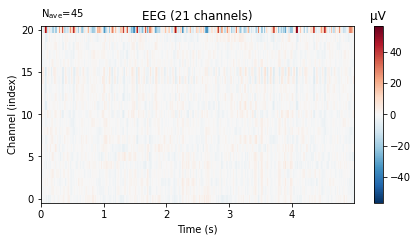

In [50]:
diff.plot_image()

In [51]:
rois = mne.channels.make_1020_channel_selections(diff.info,midline="z12")

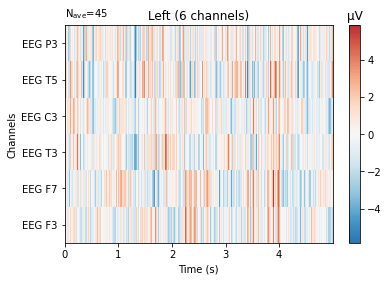

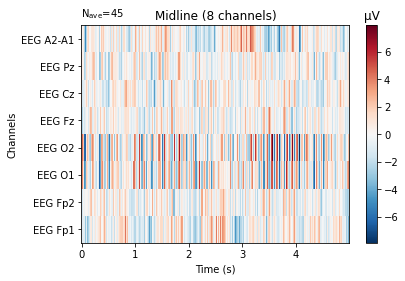

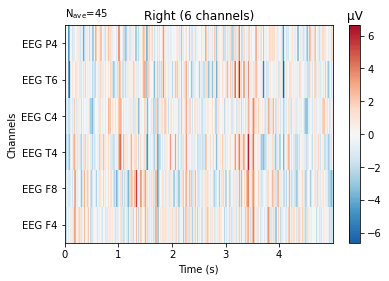

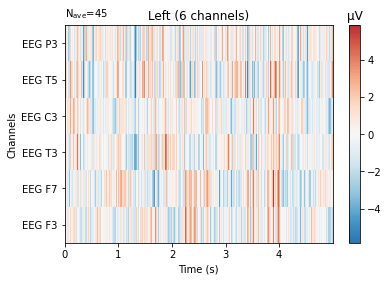

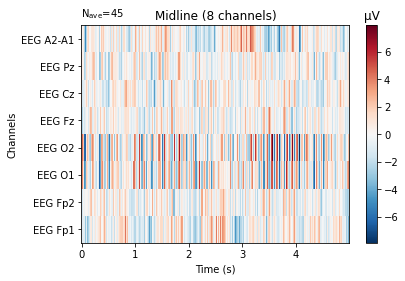

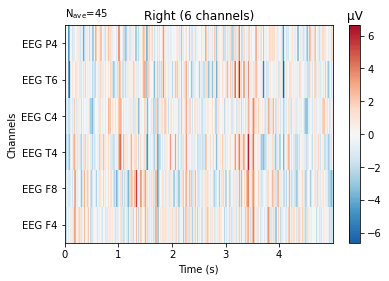

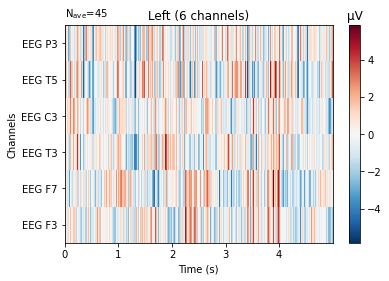

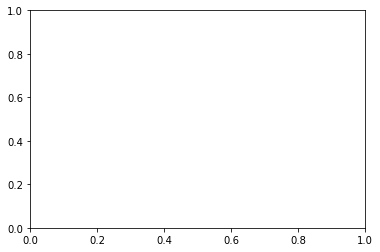

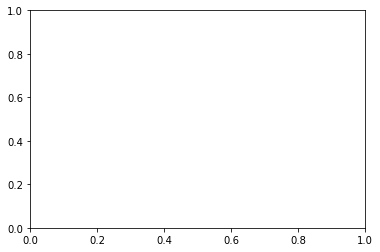

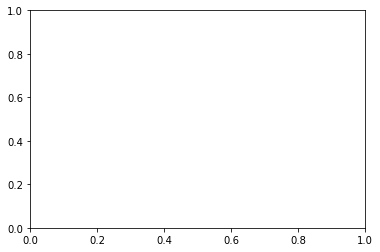

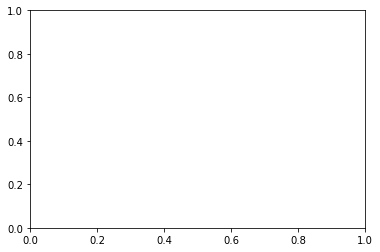

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [54]:
diff.plot_image(group_by=rois, show=True, show_names="all")

<ipython-input-156-798c53efad47>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds({"rest":rest_data_events, "task":task_data_events}, picks=[10])


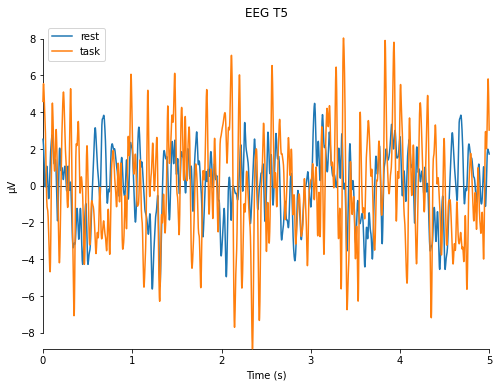

[<Figure size 576x432 with 1 Axes>]

In [156]:
mne.viz.plot_compare_evokeds({"rest":rest_data_events, "task":task_data_events}, picks=[10])

In [38]:
from mne.time_frequency import tfr_morlet

In [44]:
tfr_rest_data_events = tfr_morlet(rest_data_events, list(range(3, 30)), 3, return_itc=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished


No baseline correction applied


C:\Users\neela\anaconda3\lib\site-packages\mne\time_frequency\tfr.py:1499: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs = [plt.figure() for i in range(n_picks)]


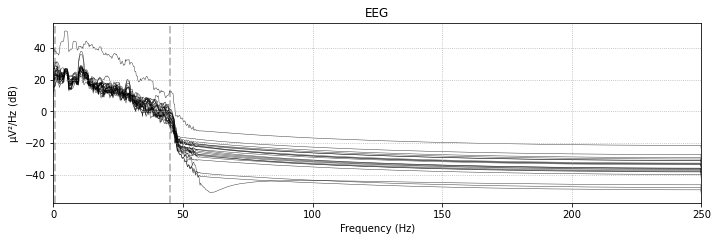

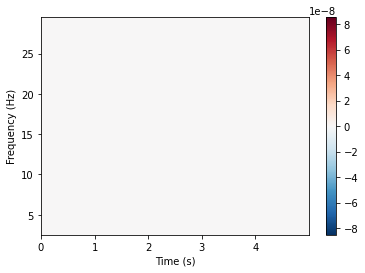

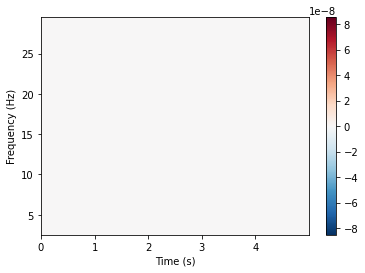

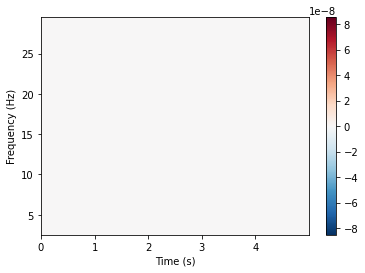

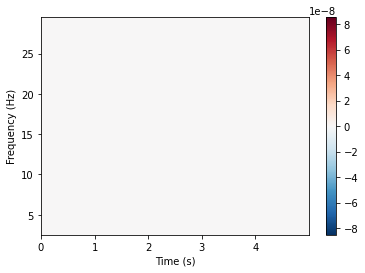

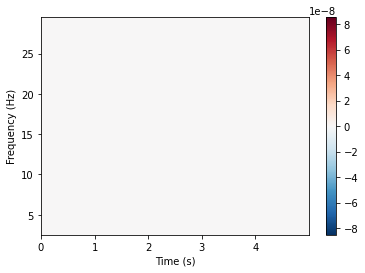

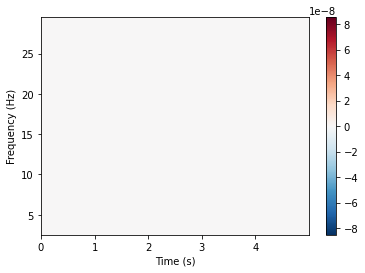

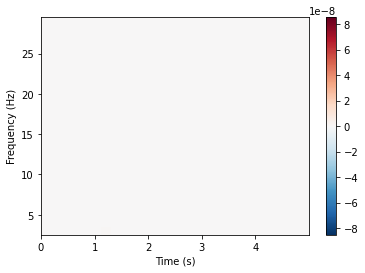

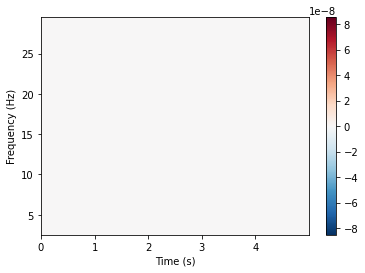

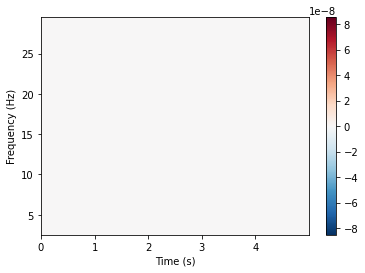

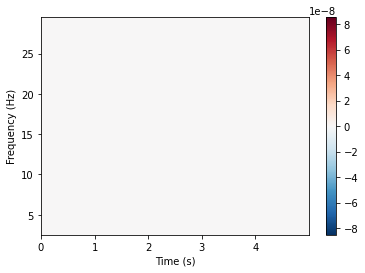

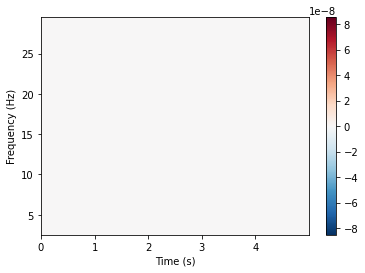

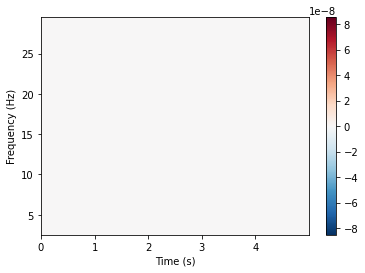

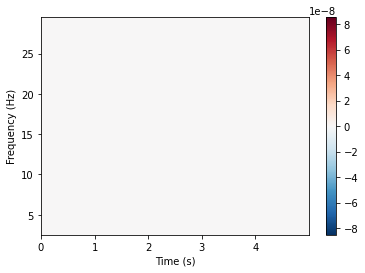

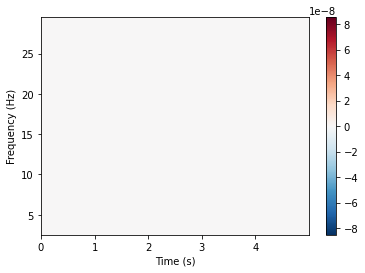

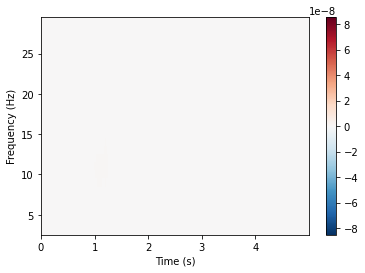

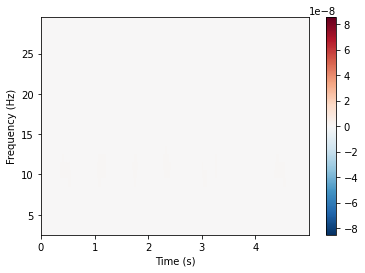

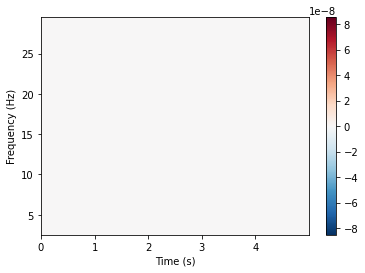

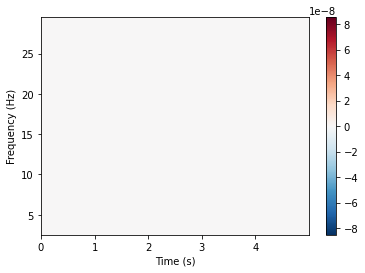

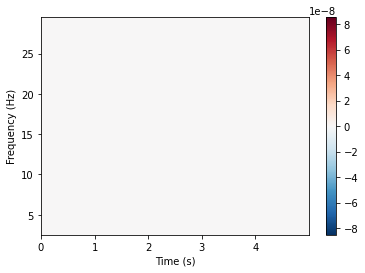

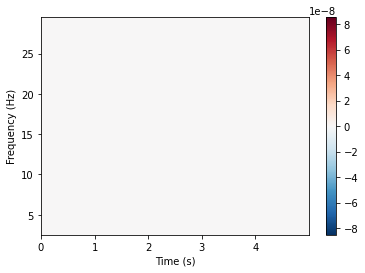

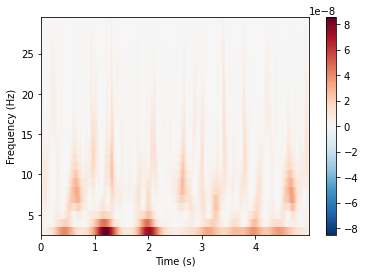

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [45]:
tfr_rest_data_events.plot()

In [61]:
tfr_task_data_events = tfr_morlet(task_data_events, list(range(3, 30)), 3, return_itc=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished


No baseline correction applied


C:\Users\neela\anaconda3\lib\site-packages\mne\time_frequency\tfr.py:1499: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs = [plt.figure() for i in range(n_picks)]


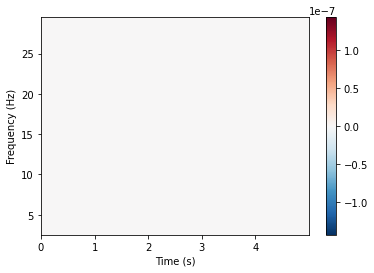

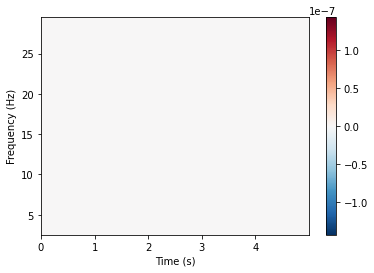

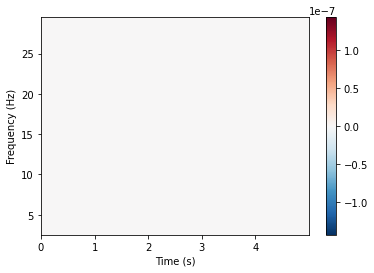

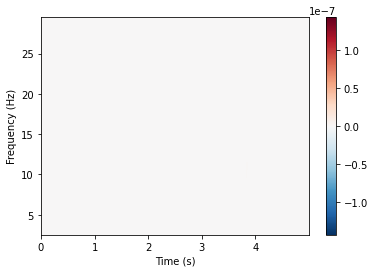

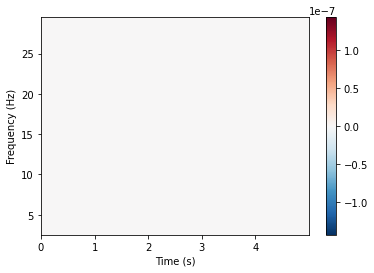

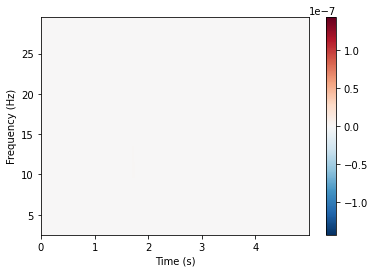

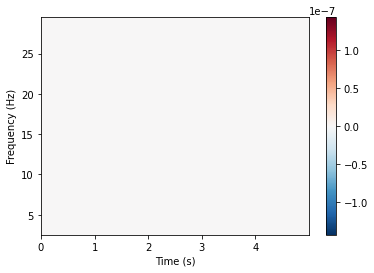

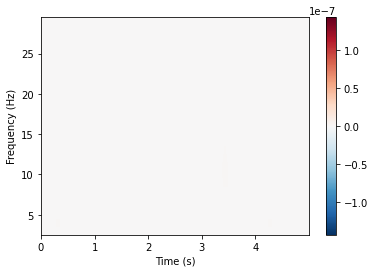

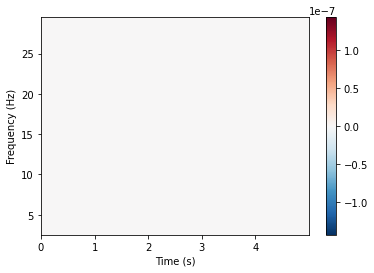

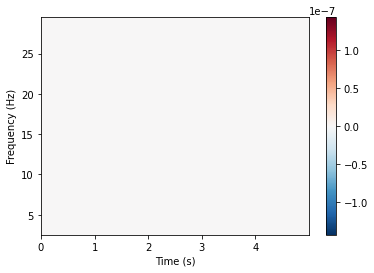

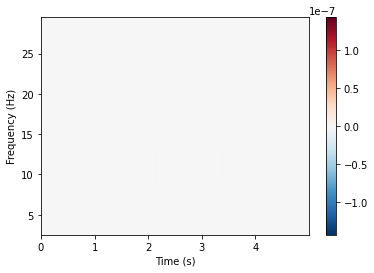

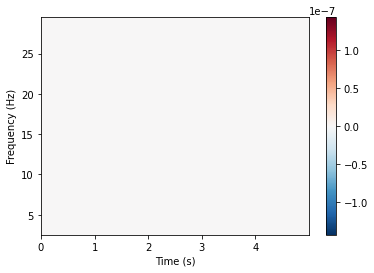

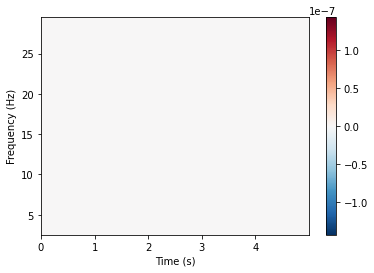

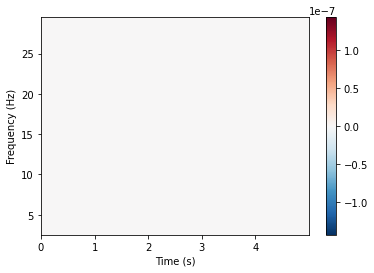

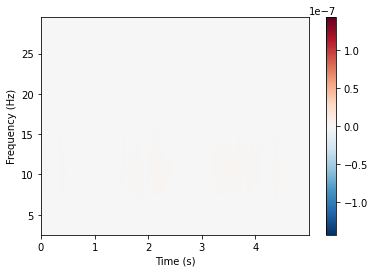

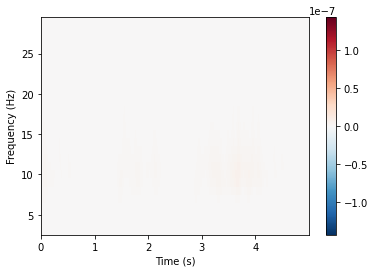

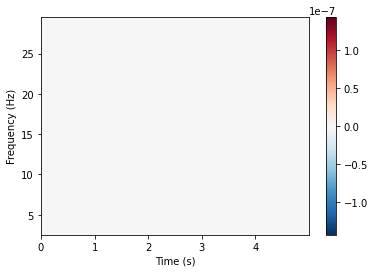

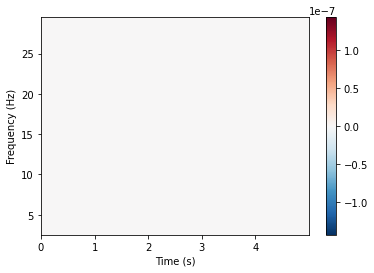

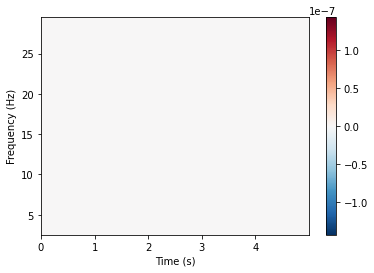

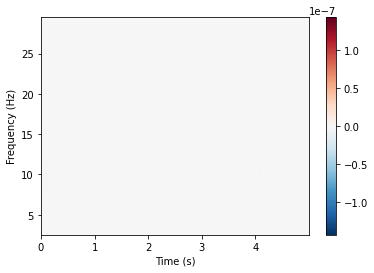

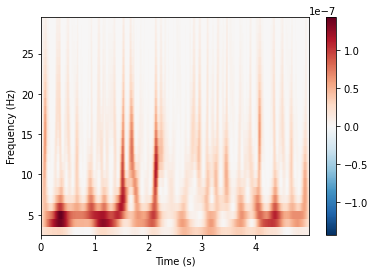

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [62]:
tfr_task_data_events.plot()

In [64]:
tfr_contrast = mne.combine_evoked((tfr_rest_data_events, tfr_task_data_events), (-.5,.5))
tfr_contrast.apply_baseline(None, 0)

No baseline correction applied


<AverageTFR | time : [0.000000, 4.998000], freq : [3.000000, 29.000000], nave : 2, channels : 21, ~10.8 MB>

No baseline correction applied


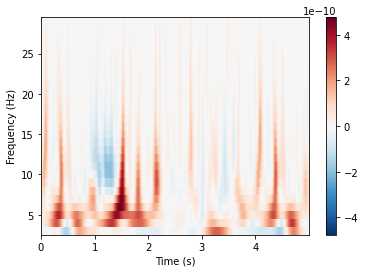

[<Figure size 432x288 with 2 Axes>]

In [71]:
tfr_contrast.plot(picks=[18])

# Stats and Machine Learning

In [103]:
def read_data(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    arr = epochs.get_data()
    return arr

In [122]:
#seperating rest and task data
raw_rest_data = [i for i in all_edf_files if '1' in i.split('_')[2]]
raw_task_data = [i for i in all_edf_files if '2' in i.split('_')[2]]

In [162]:
%%capture
rest_data_array = [read_data(i) for i in raw_rest_data]
task_data_array = [read_data(i) for i in raw_task_data]

In [135]:
rest_labels = [len(i)*[0] for i in rest_data_array]
task_labels = [len(i)*[1] for i in task_data_array]

In [136]:
data_list = rest_data_array + task_data_array
label_list = rest_labels + task_labels

In [137]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]

In [138]:
data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)

In [152]:
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)
def std(x):
    return np.std(x,axis=-1)
def ptp(x):
    return np.ptp(x,axis=-1)
def var(x):
    return np.var(x,axis=-1)
def minim(x):
    return np.min(x,axis=-1)
def maxim(x):
    return np.max(x,axis=-1)
def argminim(x):
    return np.argmin(x,axis=-1)
def argmaxim(x):
    return np.argmax(x,axis=-1)
def mean_square(data):
      return np.mean(data**2,axis=-1)
def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))
def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)
def skewness(data):
    return stats.skew(data,axis=-1)
def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

In [153]:
from tqdm import tqdm_notebook
features=[]
for data in tqdm_notebook(data_array):
    features.append(concatenate_features(data))
features=np.array(features)
features.shape

<ipython-input-153-69f2cdc0fdb1>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


(2132, 273)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV

In [142]:
clf=LogisticRegression()
gkf=GroupKFold(n_splits=2)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])

In [144]:
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
gscv.fit(features,label_array,groups=group_array)

GridSearchCV(cv=GroupKFold(n_splits=2),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [145]:
print(gscv.best_score_)

0.6731656018445185
